Beer-Lambert Calculator

Equation:

$$A = \varepsilon\,c\,\ell$$

Variables:
- $A$ : absorbance (unitless)
- $\varepsilon$ : molar extinction coefficient (M^{-1} cm^{-1})
- $c$ : concentration (M)
- $\ell$ : pathlength (cm)

Rearranged for concentration:

$$c = \frac{A}{\varepsilon\,\ell}$$

In [3]:
# User-editable inputs to calculate ideal concentration using Beer-Lambert Law
epsilon = 90000.0 # a reasonable molar extinction coefficient for BODIPY, M^-1 cm^-1
path_length = 1.0 # cuvette pathlength in cm
target_absorbance = 0.05 # ideal absorbance

def concentration_from_absorbance(A, eps, l):
    """Return concentration in M for given absorbance A, extinction eps, pathlength l."""
    return A / (eps * l)

def absorbance_from_concentration(c, eps, l):
    """Return absorbance for given concentration c (M)."""
    return eps * c * l

# Compute and print the concentration for the ideal absorbance
c_M = concentration_from_absorbance(target_absorbance, epsilon, path_length)
c_uM = c_M * 1e6
print(f"Ideal absorbance A = {target_absorbance}")
print(f"Concentration: {c_M:.3e} M ({c_uM:.2f} µM)")

Ideal absorbance A = 0.05
Concentration: 5.556e-07 M (0.56 µM)


Photobleaching Rate Calculator

Equation:

$$I(t) = I_0 e^{k t}$$

Taking the natural logarithm of both sides:

$$\ln\left(\frac{I(t)}{I_0}\right) = k t$$

Thus, plotting $\ln(I(t)/I_0)$ vs. $t$ yields a straight line with slope $k$.

Photobleaching cross-section:

$$\sigma_{bleach} = \frac{k_{bleach}}{F} = \frac{I_0 \lambda}{h c}$$

where:
- $I_0$ : initial intensity (W/cm²)
- $\lambda$ : excitation wavelength (m)
- $h$ : Planck constant (6.626 × 10⁻³⁴ J·s)
- $c$ : speed of light (3 × 10⁸ m/s)

Photobleaching rate constant (k): -1.933e-02 s^-1
Photobleaching cross-section (σ_bleach): 2.415e+18 cm² (approx)


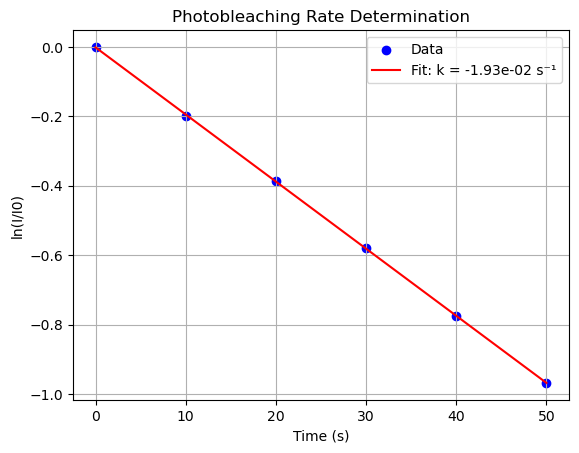

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Example user data (replace with experimental values)
time = np.array([0, 10, 20, 30, 40, 50]) # seconds
intensity = np.array([1.00, 0.82, 0.68, 0.56, 0.46, 0.38]) # arbitrary units

# Known parameters
I0 = intensity[0] # initial intensity
wavelength = 480e-9 # excitation wavelength (m)
h = 6.626e-34 # Planck constant (J*s)
c = 3.0e8 # speed of light (m/s)

# Linearize and calculate k
ln_ratio = np.log(intensity / I0)
result = linregress(time, ln_ratio)
k_bleach = result.slope

# Calculate photobleaching cross-section (sigma_bleach)
sigma_bleach = (I0 * wavelength) / (h * c)

# Output results
print(f"Photobleaching rate constant (k): {k_bleach:.3e} s^-1")
print(f"Photobleaching cross-section (σ_bleach): {sigma_bleach:.3e} cm² (approx)")

# Plot ln(I/I0) vs t
plt.figure()
plt.scatter(time, ln_ratio, color='blue', label='Data')
plt.plot(time, result.intercept + result.slope * time, color='red', label=f'Fit: k = {k_bleach:.2e} s⁻¹')
plt.xlabel('Time (s)')
plt.ylabel('ln(I/I0)')
plt.title('Photobleaching Rate Determination')
plt.legend()
plt.grid(True)
plt.show()